In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
%matplotlib inline

In [22]:
df = pd.read_csv('kc_house_data.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
zipcode          21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
age              21613 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(13)
memory usage: 2.8 MB


In [24]:
#dropping unnecessary columns
df = df.drop(['id', 'lat', 'long'], axis = 1)

In [25]:
#slicing T000000 from date column
df.date = [i[:8] for i in df.date]

In [26]:
#converting date column to datetime
df.date = pd.to_datetime(df.date)

In [112]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,60
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,64
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,50
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28


In [28]:
#converting year built to age to use as continuous variable
df['age'] = [2015 - i for i in df['yr_built']]

In [29]:
#dropping year built column as it is now 'age'
df = df.drop(['yr_built'], axis = 1)

In [30]:
df = df.drop(['yr_renovated'], axis = 1)

In [ ]:
#converting year renovated to years since renovation to use as continuous data
#df['yr_renovated'] = df.yr_renovated.apply(lambda i: 0 if i == 0 else (2015 - i))

In [104]:
#Sorting by bedrooms to look for outliers, ie. 0 bedrooms
df1 = df.sort_values(by=['bedrooms'])

In [106]:
df1.tail(13)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age
6174,2014-07-03,340000.0,8,2.75,2790,6695,1.0,0,0,3,7,1470,1320,98133,1760,7624,38
17235,2014-05-28,1970000.0,8,3.50,4440,6480,2.0,0,3,5,10,3140,1300,98112,4440,8640,56
6079,2014-08-08,1280000.0,9,4.50,3650,5000,2.0,0,0,3,8,2530,1120,98105,2510,5000,100
16844,2015-03-17,1400000.0,9,4.00,4620,5508,2.5,0,0,3,11,3870,750,98105,2710,4320,100
8546,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,98144,1448,3866,19
18443,2015-03-13,934000.0,9,3.00,2820,4480,2.0,0,0,3,7,1880,940,98105,2460,4400,97
4235,2015-01-06,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,2830,850,98102,1960,2450,107
4096,2014-05-07,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,2450,1380,98103,1460,6291,77
19254,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,98105,1810,3745,102
15161,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,98006,2040,11914,57


In [122]:
#changing column to month
df.date = [i.month for i in df.date]

In [123]:
#creating alternate dataframe to convert zipcode to dummy variables
df_dummies = pd.get_dummies(df, prefix = ['zipcode_', 'date_'], columns = ['zipcode', 'date'])

In [86]:
df.shape

(21600, 17)

In [54]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.585379,0.082447,-0.054012
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244,-0.154178
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175,-0.506019
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286,-0.318049
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557,-0.053080
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.279885,-0.011269,-0.489319
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703,0.026161
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575,0.053440
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406,0.361417
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.713202,0.119248,-0.446963


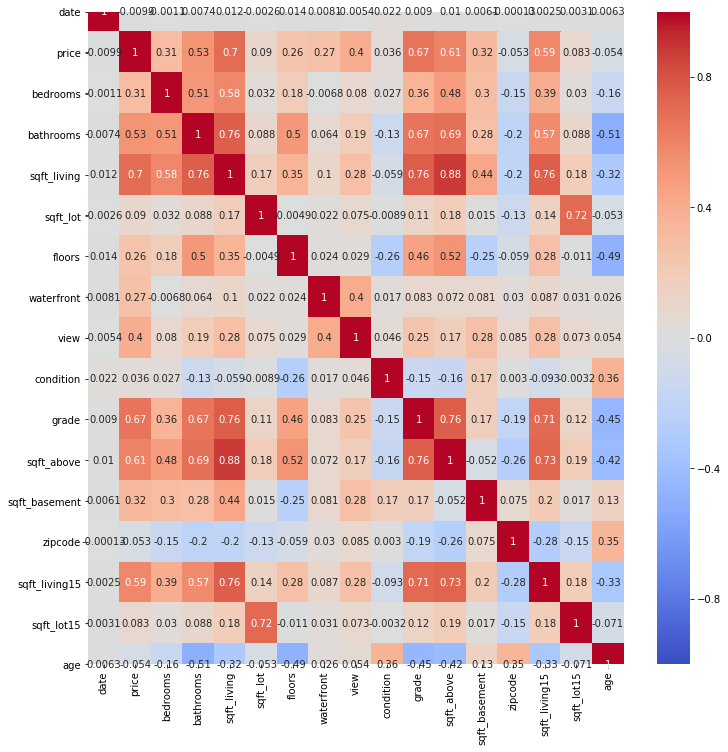

In [179]:
#creating heatmap to detect relationships between variable
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

# Checking fit with Polynomial Regression

In [115]:
y = df_dummies.price
X = df_dummies.drop(['price'], axis = 1)


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [117]:
poly = PolynomialFeatures(2)
X_fin = poly.fit_transform(X_train)
X_fin_test = poly.transform(X_test)

KeyboardInterrupt: 

In [ ]:
reg = linear_model.LinearRegression().fit(X_fin, y_train)

In [ ]:
y_pred = reg.predict(X_fin_test)

In [ ]:
print(r2_score(y_test, y_pred))

In [19]:
#creating price per sq ft column
#df['pp_sqft'] = df['price']/df['sqft_living']

In [124]:
df_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,date__3,date__4,date__5,date__6,date__7,date__8,date__9,date__10,date__11,date__12
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#df_dummies1 = df_dummies = df_dummies[df_dummies.bedrooms != 0]

In [89]:
#df_dummies1.shape

(21600, 86)

In [63]:
df.corr() > .5

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age
price,True,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False
bedrooms,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,True,True,True,True,False,True,False,False,False,True,True,False,False,True,False,False
sqft_living,True,True,True,True,False,False,False,False,False,True,True,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
floors,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,True,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False


In [ ]:
#df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')

In [ ]:
#dfpd = df.groupby(['date', 'price'])

In [ ]:
#dfpd.mean()

In [ ]:
#dfpd1 = df.drop(['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'age'], axis = 1)

In [ ]:
#dfpd1.head()

In [ ]:
#dfpdsort = dfpd1.sort_values(by='date')

In [ ]:
#dfpdsort.head(20)

In [ ]:
#dfdaily = dfpdsort.groupby(['date'])

In [ ]:
#dfplot = dfdaily.mean()

In [ ]:
#dfplot.head()

# Testing OLS models with different dropped Columns

In [176]:
outcome = 'price'
mm = df_dummies1.drop(['price', 'sqft_above', 'floors', 'bedrooms', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_basement', 'age', 'sqft_lot15', 'sqft_living15', 'bathrooms',  'sqft_living', 'grade', 'date'], axis = 1)
pred_sum = "+".join(mm.columns)
formula = outcome + "~" + pred_sum

In [177]:
#zip code alone explains %40 
model = ols(formula = formula, data = df_dummies1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     214.5
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:57:12   Log-Likelihood:            -3.0177e+05
No. Observations:               21600   AIC:                         6.037e+05
Df Residuals:                   21530   BIC:                         6.042e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.53e+05   2215.251    249.620      0.000    5.49e+05    5.57e+05
zipcode__98001 -2.718e+05   1.49e+04    -18.297      0.000   -3.01e+05   -2.43e+05
zipcode__98002 -3.187e+05   1.99e+04    -16.009      0.000   -3.58e+05    -2.8e+05
zipcode__98003 -2.589e+05   1.68e+04    -15.386      0.000   -2.92e+05   -2.26e+05
zipcode__98004   8.03e+05   1.58e+04     50.725      0.000    7.72e+05    8.34e+05
zipcode__98005  2.572e+05   2.16e+04     11.883      0.000    2.15e+05       3e+05
zipcode__98006  3.067e+05   1.27e+04     24.151      0.000    2.82e+05    3.32e+05
zipcode__98007  6.413e+04   2.36e+04      2.717      0.007    1.79e+04     1.1e+05
zipcode__98008  9.254e+04   1.67e+04      5.529      0.000    5.97e+04    1.25e+05
zipcode__98010 -1.293e+05    2.8e+04     -4.619      0.000   -1.84e+05   -7.44e+04
zipcode__98011 -6.262e+04   2.01e+04     -3.114      0.002   -1.02e+05   -2.32e+04
zipcode__98014 -9.735e+04   2.52e+04     -3.870      0.000   -1.47e+05    -4.8e+04
zipcode__98019 -1.282e+05   2.04e+04     -6.294      0.000   -1.68e+05   -8.83e+04
zipcode__98022 -2.373e+05   1.84e+04    -12.911      0.000   -2.73e+05   -2.01e+05
zipcode__98023 -2.662e+05   1.27e+04    -20.984      0.000   -2.91e+05   -2.41e+05
zipcode__98024  3.304e+04   3.13e+04      1.056      0.291   -2.83e+04    9.43e+04
zipcode__98027  6.402e+04   1.39e+04      4.597      0.000    3.67e+04    9.13e+04
zipcode__98028 -9.049e+04   1.67e+04     -5.407      0.000   -1.23e+05   -5.77e+04
zipcode__98029  5.968e+04   1.57e+04      3.794      0.000    2.88e+04    9.05e+04
zipcode__98030 -2.568e+05   1.76e+04    -14.605      0.000   -2.91e+05   -2.22e+05
zipcode__98031 -2.526e+05    1.7e+04    -14.830      0.000   -2.86e+05   -2.19e+05
zipcode__98032 -3.017e+05   2.51e+04    -12.039      0.000   -3.51e+05   -2.53e+05
zipcode__98033  2.507e+05   1.36e+04     18.426      0.000    2.24e+05    2.77e+05
zipcode__98034 -3.132e+04   1.22e+04     -2.576      0.010   -5.51e+04   -7488.961
zipcode__98038 -1.859e+05   1.17e+04    -15.874      0.000   -2.09e+05   -1.63e+05
zipcode__98039  1.608e+06   3.95e+04     40.671      0.000    1.53e+06    1.69e+06
zipcode__98040  6.413e+05   1.68e+04     38.249      0.000    6.08e+05    6.74e+05
zipcode__98042 -2.414e+05   1.21e+04    -19.891      0.000   -2.65e+05   -2.18e+05
zipcode__98045 -1.135e+05   1.89e+04     -6.005      0.000   -1.51e+05   -7.65e+04
zipcode__98052  9.226e+04   1.19e+04      7.781      0.000     6.9e+04    1.16e+05
zipcode__98053  1.237e+05   1.41e+04      8.796      0.000    9.61e+04    1.51e+05
zipcode__98055 -2.487e+05   1.72e+04    -14.468      0.000   -2.82e+05   -2.15e+05
zipcode__98056 -1.321e+05    1.4e+04     -9.417      0.000    -1.6e+05   -1.05e+05
zipcode__98058 -1.994e+05   1.33e+04    -15.025      0.000   -2.25e+05   -1.73e+05
zipcode__980

In [170]:
outcome = 'price'
mm = df_dummies.drop(['price', 'sqft_above', 'floors', 'bedrooms', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_basement', 'age', 'sqft_lot15', 'sqft_living15', 'bathrooms',  'sqft_living', 'grade'], axis = 1)
pred_sum = "+".join(mm.columns)
formula = outcome + "~" + pred_sum

In [171]:
model = ols(formula = formula, data = df_dummies1).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'date__1' is not defined
    price~zipcode__98001+zipcode__98002+zipcode__98003+zipcode__98004+zipcode__98005+zipcode__98006+zipcode__98007+zipcode__98008+zipcode__98010+zipcode__98011+zipcode__98014+zipcode__98019+zipcode__98022+zipcode__98023+zipcode__98024+zipcode__98027+zipcode__98028+zipcode__98029+zipcode__98030+zipcode__98031+zipcode__98032+zipcode__98033+zipcode__98034+zipcode__98038+zipcode__98039+zipcode__98040+zipcode__98042+zipcode__98045+zipcode__98052+zipcode__98053+zipcode__98055+zipcode__98056+zipcode__98058+zipcode__98059+zipcode__98065+zipcode__98070+zipcode__98072+zipcode__98074+zipcode__98075+zipcode__98077+zipcode__98092+zipcode__98102+zipcode__98103+zipcode__98105+zipcode__98106+zipcode__98107+zipcode__98108+zipcode__98109+zipcode__98112+zipcode__98115+zipcode__98116+zipcode__98117+zipcode__98118+zipcode__98119+zipcode__98122+zipcode__98125+zipcode__98126+zipcode__98133+zipcode__98136+zipcode__98144+zipcode__98146+zipcode__98148+zipcode__98155+zipcode__98166+zipcode__98168+zipcode__98177+zipcode__98178+zipcode__98188+zipcode__98198+zipcode__98199+date__1+date__2+date__3+date__4+date__5+date__6+date__7+date__8+date__9+date__10+date__11+date__12
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ^^^^^^^

In [70]:
outcome = 'price'
mm = df_dummies.drop(['price', 'date', 'sqft_above', 'floors', 'age'], axis = 1)
pred_sum = "+".join(mm.columns)
formula = outcome + "~" + pred_sum

In [71]:
model = ols(formula = formula, data = df_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:45:23   Log-Likelihood:            -2.9006e+05
No. Observations:               21613   AIC:                         5.803e+05
Df Residuals:                   21532   BIC:                         5.809e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.021e+05    1.3e+04    -23.208      0.000   -3.28e+05   -2.77e+05
bedrooms       -2.483e+04   1549.841    -16.019      0.000   -2.79e+04   -2.18e+04
bathrooms      -1767.5390   2360.359     -0.749      0.454   -6394.017    2858.939
sqft_living      207.9265      2.958     70.296      0.000     202.129     213.724
sqft_lot           0.2850      0.039      7.313      0.000       0.209       0.361
waterfront      6.636e+05   1.43e+04     46.321      0.000    6.35e+05    6.92e+05
view             5.76e+04   1775.976     32.434      0.000    5.41e+04    6.11e+04
condition       3.511e+04   1828.965     19.194      0.000    3.15e+04    3.87e+04
grade           4.671e+04   1752.094     26.657      0.000    4.33e+04    5.01e+04
sqft_basement    -50.6035      3.235    -15.645      0.000     -56.943     -44.264
sqft_living15     15.6227      2.917      5.357      0.000       9.906      21.339
sqft_lot15        -0.0943      0.061     -1.537      0.124      -0.215       0.026
zipcode__98001 -2.112e+05   8572.191    -24.639      0.000   -2.28e+05   -1.94e+05
zipcode__98002   -1.8e+05   1.16e+04    -15.561      0.000   -2.03e+05   -1.57e+05
zipcode__98003 -2.188e+05   9715.366    -22.525      0.000   -2.38e+05      -2e+05
zipcode__98004  5.856e+05   9285.348     63.069      0.000    5.67e+05    6.04e+05
zipcode__98005  1.091e+05   1.26e+04      8.657      0.000    8.44e+04    1.34e+05
zipcode__98006  6.361e+04   7590.695      8.379      0.000    4.87e+04    7.85e+04
zipcode__98007  4.267e+04   1.37e+04      3.121      0.002    1.59e+04    6.95e+04
zipcode__98008  5.333e+04   9705.548      5.495      0.000    3.43e+04    7.24e+04
zipcode__98010 -1.444e+05   1.62e+04     -8.894      0.000   -1.76e+05   -1.13e+05
zipcode__98011 -8.592e+04   1.16e+04     -7.386      0.000   -1.09e+05   -6.31e+04
zipcode__98014 -1.145e+05   1.48e+04     -7.719      0.000   -1.44e+05   -8.55e+04
zipcode__98019 -1.308e+05   1.18e+04    -11.056      0.000   -1.54e+05   -1.08e+05
zipcode__98022 -2.219e+05   1.08e+04    -20.472      0.000   -2.43e+05   -2.01e+05
zipcode__98023 -2.396e+05   7333.309    -32.675      0.000   -2.54e+05   -2.25e+05
zipcode__98024 -4.327e+04   1.82e+04     -2.377      0.017   -7.89e+04   -7592.377
zipcode__98027 -4.889e+04   8115.157     -6.024      0.000   -6.48e+04    -3.3e+04
zipcode__98028 -8.745e+04   9669.294     -9.045      0.000   -1.06e+05   -6.85e+04
zipcode__98029 -8303.0166   9184.061     -0.904      0.366   -2.63e+04    9698.424
zipcode__98030 -2.066e+05   1.02e+04    -20.325      0.000   -2.27e+05   -1.87e+05
zipcode__98031 -1.977e+05   9835.010    -20.107      0.000   -2.17e+05   -1.78e+05
zipcode__98032 -1.993e+05   1.45e+04    -13.755      0.000   -2.28e+05   -1.71e+05
zipcode__98033  1.599e+05   7888.247     20.273      0.000    1.44e+05    1.75e+05
zipcode__980

# Testing with modified dataset

In [129]:
y = df_dummies.price
X = df_dummies.drop(['price'], axis = 1)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 1234)

# scale the train and test data
scale = StandardScaler().fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

y_train = np.log(y_train)
y_test = np.log(y_test)

# create linear regression model
reg = LinearRegression().fit(X_train_scale, y_train)

In [131]:
print('Training R^2 :', reg.score(X_train_scale, y_train))
print('Training Root Mean Square Error', mean_squared_error(y_train, reg.predict(X_train_scale)))

print('\n----------------\n')

print('Testing R^2 :', reg.score(X_test_scale, y_test))
print('Testing Root Mean Square Error', mean_squared_error(y_test, reg.predict(X_test_scale)))

Training R^2 : 0.8803540171074693
Training Root Mean Square Error 0.03318544947726382

----------------

Testing R^2 : 0.8715685694402457
Testing Root Mean Square Error 0.03554054630496344


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


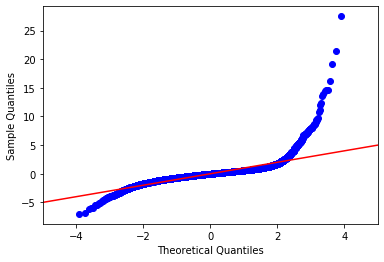

In [128]:
#Creating QQPlot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.xlim((-5,5))

fig.show()

In [149]:
#creating new dataframe for visualization
dfzip = pd.read_csv('kc_house_data.csv')

In [150]:
dfzip = dfzip.drop(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'lat', 'long'], axis = 1)

In [151]:
dfzip.head()

,price,zipcode
0,221900.0,98178
1,538000.0,98125
2,180000.0,98028
3,604000.0,98136
4,510000.0,98074


In [162]:
dfzip1 = df.groupby(['zipcode'])['price'].mean().reset_index()

In [166]:
dfzip1 = dfzip1.astype(int)

In [168]:
dfzip1

,zipcode,price
0,98001,281194
1,98002,234284
2,98003,294111
3,98004,1355927
4,98005,810164
...,...,...
65,98177,676185
66,98178,310612
67,98188,289078
68,98198,302878


In [ ]:
# dep var = price 
# continuous vars = bedrooms, bathrooms, sqft_living, sqft_lot, age, grade
# take average price per day over year and plot it 
# qqplot 